In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")           
# Warnings will appear only once

In [2]:
data = pd.read_csv(filepath_or_buffer = "events_data.csv")
print('Data Shape:', data.shape)
data.head()

Data Shape: (3252950, 7)


,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


In [3]:
data.info() # Decie ID change to integer in all only main data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [4]:
data.describe() #Negative value - # Focus area - WestBengal, Karnataka, Gujarat, Bihar, Punjab, Kerala

,event_id,device_id,longitude,latitude
count,3.252950e+06,3.252497e+06,3.252527e+06,3.252527e+06
mean,1.626476e+06,1.012200e+17,7.815868e+01,2.168851e+01
std,9.390459e+05,5.316758e+18,4.235570e+00,5.789111e+00
min,1.000000e+00,-9.222957e+18,1.256700e+01,8.190110e+00
25%,8.132382e+05,-4.540611e+18,7.583543e+01,1.780171e+01
50%,1.626476e+06,1.726820e+17,7.726814e+01,2.216454e+01
75%,2.439713e+06,4.861813e+18,8.031916e+01,2.868278e+01
max,3.252950e+06,9.222849e+18,9.545946e+01,4.187190e+01


In [5]:
data.shape[0]-data.count() 
# update state basis on city
# Update long & Lati with MODE basis city

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

In [6]:
data.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

In [7]:
data.duplicated().sum() # No duplicates row

0

In [8]:
data.duplicated('device_id').value_counts()

True     3192084
False      60866
dtype: int64

In [9]:
data.duplicated('event_id').value_counts() #No duplicate value in event ID, hence we would fill device_id with dummy value '1'

False    3252950
dtype: int64

In [10]:
data.groupby('state').nunique()

,event_id,device_id,timestamp,longitude,latitude,city
state,,,,,,
AndamanandNicobarIslands,1515,41,1505,41,41,1
AndhraPradesh,321332,4929,236345,4909,4915,104
ArunachalPradesh,608,32,603,32,32,1
Assam,12021,483,11738,483,483,15
Bihar,35472,1372,33896,1374,1374,43
Chandigarh,894,35,884,35,35,1
Chhattisgarh,9754,400,9576,400,400,12
Delhi,751733,4909,412084,4795,4789,10
Goa,3250,76,3203,76,76,3


In [11]:
data[data['event_id']==835202]

,event_id,device_id,timestamp,longitude,latitude,city,state
269500,835202,-3.628420e+17,2016-05-03 06:54:24,73.909012,18.581745,Pune,Maharashtra


# Updating 'device_id' Missing value

In [12]:
data["lat_long"]= data['latitude'].astype(str) + "," + data['longitude'].astype(str)

In [13]:
data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,lat_long
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,"28.73014,77.22567599999998"
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,"22.660325,88.388361"
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,"28.757906,77.25680899999998"
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,"13.153332,80.34361299999998"
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,"23.842609,85.997745"


In [14]:
data_deviceid=data[['device_id','lat_long']]

In [15]:
data_deviceid.head()

,device_id,lat_long
0,2.973348e+18,"28.73014,77.22567599999998"
1,4.734221e+18,"22.660325,88.388361"
2,-3.264500e+18,"28.757906,77.25680899999998"
3,5.731369e+18,"13.153332,80.34361299999998"
4,3.388880e+17,"23.842609,85.997745"


In [16]:
data_deviceid_null=data_deviceid.dropna().drop_duplicates()

In [17]:
data_deviceid_null=data_deviceid_null.drop_duplicates(subset=['lat_long'],keep='first')

In [18]:
data_deviceid_null.groupby('lat_long').nunique().count()

device_id    60870
dtype: int64

In [19]:
data_deviceid_null.isnull().sum()

device_id    0
lat_long     0
dtype: int64

In [20]:
data_deviceid_null2 = data[data.device_id.isnull()].lat_long.dropna().unique()
data_deviceid_null2

array(['22.814519,75.88295600000002', '26.948689,75.888487',
       '26.960796,75.846007', '22.777781,75.92333199999999',
       '31.561747,75.99255099999998', '18.628057,73.862756',
       '18.566925,73.86016500000002', '17.805195,83.357991',
       '28.719966000000003,77.29248100000002',
       '18.614812,73.92649899999998', '13.153332,80.34361299999998',
       '13.149176,80.30927199999998', '28.721053,77.27481399999998',
       '17.752819,83.371738', '22.817526,75.95805', '17.822906,83.342711',
       '26.95399,75.836167', '13.189053,80.33543499999998',
       '21.194283,73.16934499999998', '21.790693,70.686387',
       '28.728888,77.30315300000002'], dtype=object)

In [21]:
for ind in data_deviceid_null2:
    data['device_id']=np.where(((data['lat_long'] == ind) & (data['device_id'].isnull())),data_deviceid_null.query('lat_long == @ind')['device_id'],data['device_id'])

In [22]:
data.isnull().sum()

event_id       0
device_id      0
timestamp      0
longitude    423
latitude     423
city           0
state        377
lat_long       0
dtype: int64

In [23]:
data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,lat_long
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,"28.73014,77.22567599999998"
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,"22.660325,88.388361"
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,"28.757906,77.25680899999998"
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,"13.153332,80.34361299999998"
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,"23.842609,85.997745"


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
 7   lat_long   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 198.5+ MB


# Updating 'latitude' & 'longitude' missing values

In [25]:
data_latlong=data[['device_id','latitude','longitude']]

In [26]:
data_latlong_null=data_latlong.dropna().drop_duplicates()

In [27]:
data_latlong_null=data_latlong_null.drop_duplicates(subset=['device_id'],keep='first')

In [28]:
data_latlong_null1 = data[data.latitude.isnull()].device_id.dropna().unique()
data_latlong_null1

array([ 1.77963102e+18, -8.79056003e+18,  4.86560657e+18,  7.98387143e+18,
       -7.36484063e+18,  5.37559902e+18,  5.51865960e+18,  4.58017944e+18,
       -6.03379839e+18,  7.66213914e+18,  2.35097940e+18,  4.37503983e+18,
        4.78258205e+18,  1.32005098e+18,  5.73136927e+18,  3.73828049e+18,
        3.05848775e+17,  7.01860038e+18,  5.11518528e+18,  6.77407134e+18,
        3.09916855e+18])

In [29]:
for ind in data_latlong_null1:
    data['latitude']=np.where(((data['device_id'] == ind) & (data['latitude'].isnull())),data_latlong_null.query('device_id == @ind')['latitude'],data['latitude'])
    data['longitude']=np.where(((data['device_id'] == ind) & (data['longitude'].isnull())),data_latlong_null.query('device_id == @ind')['longitude'],data['longitude'])

In [30]:
data.isnull().sum()

event_id       0
device_id      0
timestamp      0
longitude      0
latitude       0
city           0
state        377
lat_long       0
dtype: int64

In [31]:
data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,lat_long
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,"28.73014,77.22567599999998"
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,"22.660325,88.388361"
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,"28.757906,77.25680899999998"
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,"13.153332,80.34361299999998"
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,"23.842609,85.997745"


# Updating 'state' Missing Values

In [32]:
data_state=data[['city','state']]

In [33]:
datanull=data_state.dropna().drop_duplicates()

In [34]:
datanull=datanull.drop_duplicates(subset=['city'],keep='first')

In [35]:
datanull.query('city == "Chennai"')['state']

3    TamilNadu
Name: state, dtype: object

In [36]:
data_city_null = data[data.state.isnull()].city.dropna().unique()
data_city_null

array(['Pune', 'Visakhapatnam', 'Indore', 'Chennai', 'Delhi',
       'Channapatna', 'Jaipur', 'Gangarampur', 'Arambagh'], dtype=object)

In [37]:
for ind in data_city_null:
    data['state']=np.where(((data['city'] == ind) & (data['state'].isnull())),datanull.query('city == @ind')['state'],data['state'])

In [38]:
data.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
lat_long     0
dtype: int64

In [39]:
data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,lat_long
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,"28.73014,77.22567599999998"
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,"22.660325,88.388361"
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,"28.757906,77.25680899999998"
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,"13.153332,80.34361299999998"
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,"23.842609,85.997745"


# Lat & long outlier imputation

In [40]:
data["city_state"] = data["city"] +"," +data["state"]

In [41]:
#getting max lat long for each city
data_max_lat_long = data.groupby(["city_state","lat_long"]).count().sort_values("event_id").groupby(level=0).tail(1).reset_index()

In [42]:
#filtering and dropping the columns needed
data_max_lat_long=data_max_lat_long[['city_state','lat_long']]
data_max_lat_long.rename(columns = {'lat_long':'max_latlong'}, inplace = True)
#df_final.drop(columns=['latlong'],inplace=True)

In [43]:
data_max_lat_long.head()

,city_state,max_latlong
0,"Hyderabad,Telangana","17.459204,78.521052"
1,"Attur,TamilNadu","11.674911,78.682538"
2,"Sandila,UttarPradesh","27.114582,80.54612399999998"
3,"TheniAllinagaram,TamilNadu","10.080929,77.541038"
4,"Tenali,AndhraPradesh","16.275399,80.697401"


In [44]:
#left join
data=pd.merge(data,data_max_lat_long,how='left',on='city_state')
len(data)

3252950

In [45]:
data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,lat_long,city_state,max_latlong
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,"28.73014,77.22567599999998","Delhi,Delhi","28.749820000000003,77.29399099999998"
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,"22.660325,88.388361","Calcutta,WestBengal","22.60745,88.3813"
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,"28.757906,77.25680899999998","Delhi,Delhi","28.749820000000003,77.29399099999998"
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,"13.153332,80.34361299999998","Chennai,TamilNadu","13.128174,80.359796"
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,"23.842609,85.997745","Bokaro,Jharkhand","23.79424,86.000075"


In [46]:
#splitting the latlong column and joining with original dataframe
data_split=data['max_latlong'].str.split(',',expand=True)
data=data.join(data_split)
len(data)

3252950

In [47]:
data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,lat_long,city_state,max_latlong,0,1
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,"28.73014,77.22567599999998","Delhi,Delhi","28.749820000000003,77.29399099999998",28.749820000000003,77.29399099999998
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,"22.660325,88.388361","Calcutta,WestBengal","22.60745,88.3813",22.60745,88.3813
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,"28.757906,77.25680899999998","Delhi,Delhi","28.749820000000003,77.29399099999998",28.749820000000003,77.29399099999998
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,"13.153332,80.34361299999998","Chennai,TamilNadu","13.128174,80.359796",13.128174,80.359796
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,"23.842609,85.997745","Bokaro,Jharkhand","23.79424,86.000075",23.79424,86.000075


In [48]:
#renaming columns and roudning the values to six decimal places
data.rename(columns={0:'lat_max',1:'long_max'},inplace=True)
data['lat_max']=data['lat_max'].astype('float').round(decimals=6)
data['long_max']=data['long_max'].astype('float').round(decimals=6)

In [49]:
data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,lat_long,city_state,max_latlong,lat_max,long_max
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,"28.73014,77.22567599999998","Delhi,Delhi","28.749820000000003,77.29399099999998",28.749820,77.293991
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,"22.660325,88.388361","Calcutta,WestBengal","22.60745,88.3813",22.607450,88.381300
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,"28.757906,77.25680899999998","Delhi,Delhi","28.749820000000003,77.29399099999998",28.749820,77.293991
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,"13.153332,80.34361299999998","Chennai,TamilNadu","13.128174,80.359796",13.128174,80.359796
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,"23.842609,85.997745","Bokaro,Jharkhand","23.79424,86.000075",23.794240,86.000075


In [50]:
#haversine formula
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
        a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2
    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [51]:
#finding distance between lat long and max lat long
#greater distance between two points is outlayer
#handling the outlayer is done by replacing that lat long with max lat long
data['dist'] = haversine(data.latitude, data.longitude,data.lat_max,data.long_max)

In [52]:
data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,lat_long,city_state,max_latlong,lat_max,long_max,dist
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,"28.73014,77.22567599999998","Delhi,Delhi","28.749820000000003,77.29399099999998",28.749820,77.293991,7.010778
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,"22.660325,88.388361","Calcutta,WestBengal","22.60745,88.3813",22.607450,88.381300,5.923924
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,"28.757906,77.25680899999998","Delhi,Delhi","28.749820000000003,77.29399099999998",28.749820,77.293991,3.734501
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,"13.153332,80.34361299999998","Chennai,TamilNadu","13.128174,80.359796",13.128174,80.359796,3.300970
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,"23.842609,85.997745","Bokaro,Jharkhand","23.79424,86.000075",23.794240,86.000075,5.383607


In [53]:
data[data['dist'] > 30].count() # lat/long Outliers

event_id       63
device_id      63
timestamp      63
longitude      63
latitude       63
city           63
state          63
lat_long       63
city_state     63
max_latlong    63
lat_max        63
long_max       63
dist           63
dtype: int64

In [54]:
#handling outliers
data['longitude']=np.where(data['dist']>30,data['long_max'],data['longitude'])
data['latitude']=np.where(data['dist']>30,data['lat_max'],data['latitude'])

In [55]:
#filtering req columns alone
data_final=data[['event_id','device_id','timestamp','longitude','latitude','city','state']]

In [56]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 327.5+ MB


In [57]:
data_final.isnull().sum() #No more missing value

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

# Phone_data pre processing

In [58]:
#import mysql.connector as connection
#try:
   # mydb = connection.connect(host="cpanel.insaid.co", database ="Capstone1", user="student", passwd="student", use_pure=True)
   # query = "Select * from phone_brand_device_model limit 100;"
   # result_dataFrame = pd.read_sql(query,mydb)
   # mydb.close() #close the connection
#except Exception as e:
   # mydb.close()
   # print(str(e))
# print(result_dataFrame)

In [59]:
data_phone = pd.read_csv(filepath_or_buffer = "phone_brand_device_model.csv")
print('Data Shape:', data_phone.shape)
data_phone.head()

Data Shape: (87726, 3)


,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [60]:
#Updating non-english phone_brand with english
brand_data=pd.read_excel('phone_brand_mapping.xlsx')

In [61]:
brand_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Brand Name             10 non-null     object
 1   Brand English Mapping  10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [62]:
#getting that into list
name=list(brand_data['Brand Name'])
mapping=list(brand_data['Brand English Mapping'])

In [63]:
name

["'华为'",
 "'小米'",
 "'三星'",
 "'vivo'",
 "'OPPO'",
 "'魅族'",
 "'酷派'",
 "'乐视'",
 "'联想 '",
 "'HTC'"]

In [64]:
#removing the single quotes
name=[i.lstrip("'").rstrip("\xa0'") for i in name]
mapping=[i.lstrip("'").rstrip("'") for i in mapping]

In [65]:
#duplicating the column for validation
data_phone['phone_brand_copy']=data_phone['phone_brand']

In [66]:
#creating dictinoary that can be mapped later to replace function
match=dict(zip(name,mapping))

In [67]:
match

{'华为': 'Huawei',
 '小米': 'Xiaomi',
 '三星': 'Samsung',
 'vivo': 'vivo',
 'OPPO': 'OPPO',
 '魅族': 'Meizu',
 '酷派': 'Coolpad',
 '乐视': 'LeEco',
 '联想 ': 'Lenovo',
 'HTC': 'HTC'}

In [68]:
del match["HTC"]
del match["OPPO"]
del match["vivo"]

In [69]:
#replacing the symbols
data_phone_final=data_phone.replace({'phone_brand':match},regex=True)
len(data_phone_final)

87726

In [70]:
#validating the results
data_phone_final[data_phone_final['phone_brand_copy'].isin(name)]
len(data_phone_final)

87726

In [71]:
data_phone_final.head()

,device_id,phone_brand,device_model,phone_brand_copy
0,1877775838486905855,vivo,Y13,vivo
1,-3766087376657242966,Xiaomi,V183,小米
2,-6238937574958215831,OPPO,R7s,OPPO
3,8973197758510677470,Samsung,A368t,三星
4,-2015528097870762664,Xiaomi,红米Note2,小米


In [72]:
data_phone_final[data_phone_final['phone_brand'] == "Lenovo"].value_counts()

device_id             phone_brand  device_model  phone_brand_copy
-9202108340585996084  Lenovo       V5S           联想                  1
 2933400578320518263  Lenovo       Grand X Quad  联想                  1
 3010460780499485133  Lenovo       N986          联想                  1
 3099915963792905380  Lenovo       G717C         联想                  1
 3102654640898918860  Lenovo       U930          联想                  1
                                                                    ..
-3040256715311273894  Lenovo       Grand Memo 2  联想                  1
-3033413179625185153  Lenovo       V5 Max        联想                  1
-3020202422762517171  Lenovo       N881F         联想                  1
-2987434471937862866  Lenovo       U956          联想                  1
 9219560902355658593  Lenovo       Q505T         联想                  1
Length: 982, dtype: int64

In [73]:
data_phone_final.drop(['phone_brand_copy'], axis=1, inplace=True)

In [74]:
data_phone_final.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,Xiaomi,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,Samsung,A368t
4,-2015528097870762664,Xiaomi,红米Note2


In [75]:
data_phone_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [76]:
data_phone_final['device_id']=data_phone_final['device_id'].astype('float')

In [77]:
data_phone_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   device_id     87726 non-null  float64
 1   phone_brand   87726 non-null  object 
 2   device_model  87726 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


# Pre-processing 'gender' data

In [78]:
#import mysql.connector as connection
#try:
   # mydb = connection.connect(host="cpanel.insaid.co", database ="Capstone1", user="student", passwd="student", use_pure=True)
   # query = "Select * from gender_age_train limit 100;"
   # result_dataFrame = pd.read_sql(query,mydb)
   # mydb.close() #close the connection
#except Exception as e:
   # mydb.close()
   # print(str(e))
# print(result_dataFrame)

In [79]:
data_gender = pd.read_csv(filepath_or_buffer = "gender_age_train.csv")
print('Data Shape:', data_gender.shape)
data_gender.head()

Data Shape: (74645, 4)


,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [80]:
data_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [81]:
data_gender.shape[0]-data_gender.count()

device_id    0
gender       0
age          0
group        0
dtype: int64

In [82]:
data_gender.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [83]:
data_gender['group'].unique()

array(['M32-38', 'M29-31', 'F24-26', 'F33-42', 'F27-28', 'M39+', 'M23-26',
       'M27-28', 'M22-', 'F43+', 'F23-', 'F29-32'], dtype=object)

In [84]:
data_gender['gender'].unique()

array(['M', 'F'], dtype=object)

In [85]:
data_gender[data_gender['gender'] == 'M'].count()

device_id    47904
gender       47904
age          47904
group        47904
dtype: int64

In [86]:
data_gender[data_gender['gender'] == 'F'].count()

device_id    26741
gender       26741
age          26741
group        26741
dtype: int64

In [87]:
np.where(data_gender['gender']=='F')

(array([    5,     9,    11, ..., 74630, 74631, 74638], dtype=int64),)

In [88]:
data_gender['device_id']=data_gender['device_id'].astype('float') #Converting device_id as float data type

In [89]:
data_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   device_id  74645 non-null  float64
 1   gender     74645 non-null  object 
 2   age        74645 non-null  int64  
 3   group      74645 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


# Merging data set

In [90]:
df=pd.merge(data_final,data_gender,how='left',on='device_id')
len(df)

3252950

In [91]:
df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi,M,35,M32-38
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,M,30,M29-31
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi,M,24,M23-26
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,M,26,M23-26
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand,M,30,M29-31


In [92]:
df.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
gender       0
age          0
group        0
dtype: int64

In [93]:
df_final=pd.merge(df,data_phone_final,how='left',on='device_id')
len(df_final)

3252950

In [94]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252950 entries, 0 to 3252949
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   event_id      int64  
 1   device_id     float64
 2   timestamp     object 
 3   longitude     float64
 4   latitude      float64
 5   city          object 
 6   state         object 
 7   gender        object 
 8   age           int64  
 9   group         object 
 10  phone_brand   object 
 11  device_model  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 322.6+ MB


In [95]:
df_final.isnull().sum()

event_id        0
device_id       0
timestamp       0
longitude       0
latitude        0
city            0
state           0
gender          0
age             0
group           0
phone_brand     0
device_model    0
dtype: int64

In [96]:
# Focus area - WestBengal, Karnataka, Gujarat, Bihar, Punjab, Kerala
focus_state = ['WestBengal', 'Karnataka', 'Gujarat', 'Bihar', 'Punjab', 'Kerala']
focus_state

['WestBengal', 'Karnataka', 'Gujarat', 'Bihar', 'Punjab', 'Kerala']

In [97]:
data_filter=df_final[df_final['state'].isin(focus_state)]

In [98]:
data_filter.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,M,30,M29-31,vivo,X5M
28,769546,-1.817502e+18,2016-05-01 14:07:23,88.371813,22.662852,Calcutta,WestBengal,F,43,F43+,OPPO,R819T
30,1750603,-5.598137e+18,2016-05-05 15:47:03,70.212684,23.118370,Gandhidham,Gujarat,M,23,M23-26,Meizu,MX3
31,3085968,-3.808297e+18,2016-05-07 01:25:47,75.513019,11.812367,Thalassery,Kerala,M,24,M23-26,vivo,X5L
39,1407594,-2.995508e+18,2016-05-03 20:01:35,77.805194,13.533295,ChikBallapur,Karnataka,M,29,M29-31,OPPO,R7 Plus


In [99]:
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422971 entries, 1 to 3252921
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   event_id      422971 non-null  int64  
 1   device_id     422971 non-null  float64
 2   timestamp     422971 non-null  object 
 3   longitude     422971 non-null  float64
 4   latitude      422971 non-null  float64
 5   city          422971 non-null  object 
 6   state         422971 non-null  object 
 7   gender        422971 non-null  object 
 8   age           422971 non-null  int64  
 9   group         422971 non-null  object 
 10  phone_brand   422971 non-null  object 
 11  device_model  422971 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 42.0+ MB


In [100]:
data_filter['state'].unique()

array(['WestBengal', 'Gujarat', 'Kerala', 'Karnataka', 'Punjab', 'Bihar'],
      dtype=object)

In [101]:
data_filter.to_csv(r'C:\Users\rahul_gupta17\Downloads\My_EDA_Data.csv', index=False)

# Distribution of Users(device_id) across States

<AxesSubplot:xlabel='state'>

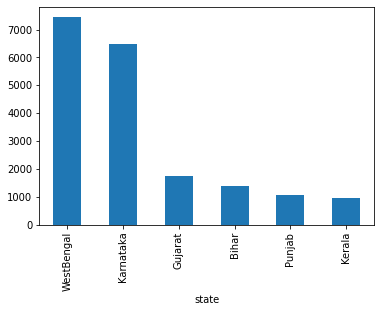

In [102]:
data_filter.groupby('state')['device_id'].nunique().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:ylabel='device_id'>

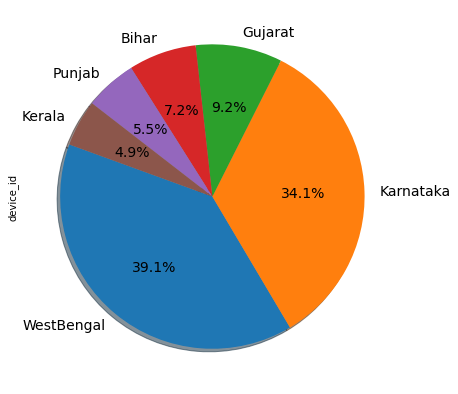

In [103]:
figure=plt.figure(figsize=[15, 7])
data_filter.groupby('state')['device_id'].nunique().sort_values(ascending=False).plot(kind='pie', fontsize=14, autopct='%3.1f%%', shadow=True, startangle=160)


In [104]:
## West Bengal leads the maximum userbase with 39.1% followed by Karnataka with 34.1%.
## West Bengal and Karnataka combinely contributes more than 73% of the total users

# 2. Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands)

<AxesSubplot:ylabel='device_id'>

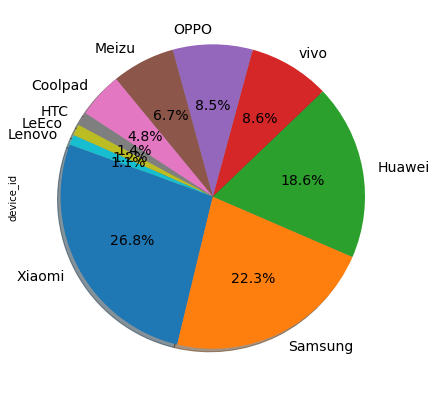

In [105]:
figure=plt.figure(figsize=[15, 7])
data_filter.groupby('phone_brand')['device_id'].nunique().sort_values(ascending=False).head(10).plot(kind='pie', fontsize=14, autopct='%3.1f%%', shadow=True, startangle=160)


<AxesSubplot:xlabel='phone_brand'>

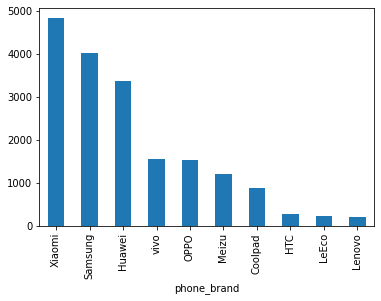

In [106]:
data_filter.groupby('phone_brand')['device_id'].nunique().sort_values(ascending=False).head(10).plot(kind='bar')

In [107]:
data_filter.groupby('phone_brand')['device_id'].nunique().sort_values(ascending=False).head(10)

phone_brand
Xiaomi     4820
Samsung    4004
Huawei     3353
vivo       1552
OPPO       1524
Meizu      1207
Coolpad     867
HTC         257
LeEco       213
Lenovo      189
Name: device_id, dtype: int64

In [108]:
## Xiaomi is the market leader in phone market share of 26.8% followed by Samsung & Huawei having market share of 22.3 and 18.6 respectively.

# 3. Distribution of Users across Gender

<AxesSubplot:ylabel='device_id'>

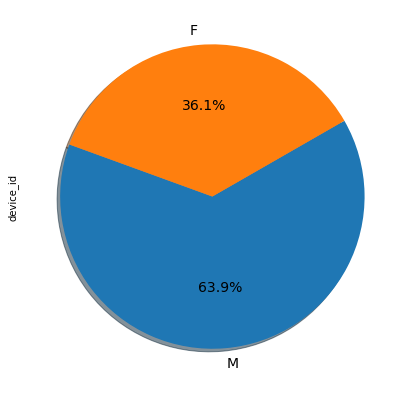

In [109]:
figure=plt.figure(figsize=[15, 7])
data_filter.groupby('gender')['device_id'].nunique().sort_values(ascending=False).plot(kind='pie', fontsize=14, autopct='%3.1f%%', shadow=True, startangle=160)

In [110]:
## In gender perpective, clearly male dominant the mobile user segment having nearly two thirds share.

# 4. Distribution of Users across Age Segments.

In [111]:
data_filter.age.min()

11

In [112]:
data_filter.age.max()

88

In [113]:
labels=['11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90']
data_filter['age_segment'] = pd.cut(data_filter.age,bins=np.arange(10,100,10),labels=labels,right=True)
data_filter.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model,age_segment
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,M,30,M29-31,vivo,X5M,21-30
28,769546,-1.817502e+18,2016-05-01 14:07:23,88.371813,22.662852,Calcutta,WestBengal,F,43,F43+,OPPO,R819T,41-50
30,1750603,-5.598137e+18,2016-05-05 15:47:03,70.212684,23.118370,Gandhidham,Gujarat,M,23,M23-26,Meizu,MX3,21-30
31,3085968,-3.808297e+18,2016-05-07 01:25:47,75.513019,11.812367,Thalassery,Kerala,M,24,M23-26,vivo,X5L,21-30
39,1407594,-2.995508e+18,2016-05-03 20:01:35,77.805194,13.533295,ChikBallapur,Karnataka,M,29,M29-31,OPPO,R7 Plus,21-30


In [114]:
data_filter['age_segment'].value_counts()

21-30    212482
31-40    112328
41-50     46622
11-20     29829
51-60     14486
61-70      5908
71-80      1110
81-90       206
Name: age_segment, dtype: int64

<AxesSubplot:xlabel='age_segment', ylabel='count'>

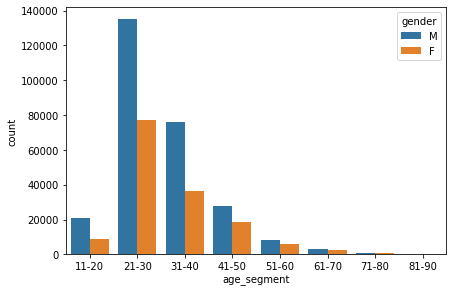

In [115]:
plt.figure(figsize= (15,10))

plt.subplot(2,2,1)
sns.countplot('age_segment', hue='gender', data=data_filter) #order=data_filter.sort_values('gender').age_segment)

<AxesSubplot:ylabel='device_id'>

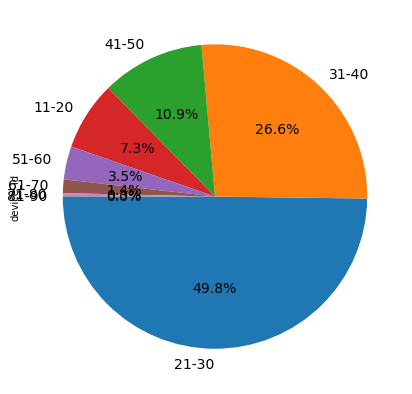

In [116]:
figure=plt.figure(figsize=[15, 7])
data_filter.groupby('age_segment')['device_id'].nunique().sort_values(ascending=False).plot(kind='pie', fontsize=14, autopct='%3.1f%%', shadow=False, startangle=180)

# 5. Distribution of Phone Brands(Consider only the 10 Most used Phone Brands) for each Age Segment, State, and Gender

In [117]:
top_brand = ['Xiaomi', 'Samsung', 'Huawei', 'vivo', 'OPPO', 'Meizu', 'Coolpad', 'HTC', 'LeEco', 'Lenovo' ]
top_brand

['Xiaomi',
 'Samsung',
 'Huawei',
 'vivo',
 'OPPO',
 'Meizu',
 'Coolpad',
 'HTC',
 'LeEco',
 'Lenovo']

In [118]:
top_brand_data=data_filter[data_filter['phone_brand'].isin(top_brand)]
top_brand_data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model,age_segment
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,M,30,M29-31,vivo,X5M,21-30
28,769546,-1.817502e+18,2016-05-01 14:07:23,88.371813,22.662852,Calcutta,WestBengal,F,43,F43+,OPPO,R819T,41-50
30,1750603,-5.598137e+18,2016-05-05 15:47:03,70.212684,23.118370,Gandhidham,Gujarat,M,23,M23-26,Meizu,MX3,21-30
31,3085968,-3.808297e+18,2016-05-07 01:25:47,75.513019,11.812367,Thalassery,Kerala,M,24,M23-26,vivo,X5L,21-30
39,1407594,-2.995508e+18,2016-05-03 20:01:35,77.805194,13.533295,ChikBallapur,Karnataka,M,29,M29-31,OPPO,R7 Plus,21-30


In [119]:
top_brand_data_final=top_brand_data.drop_duplicates(subset='device_id')

In [120]:
top_brand_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17986 entries, 1 to 3252525
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   event_id      17986 non-null  int64   
 1   device_id     17986 non-null  float64 
 2   timestamp     17986 non-null  object  
 3   longitude     17986 non-null  float64 
 4   latitude      17986 non-null  float64 
 5   city          17986 non-null  object  
 6   state         17986 non-null  object  
 7   gender        17986 non-null  object  
 8   age           17986 non-null  int64   
 9   group         17986 non-null  object  
 10  phone_brand   17986 non-null  object  
 11  device_model  17986 non-null  object  
 12  age_segment   17986 non-null  category
dtypes: category(1), float64(3), int64(2), object(7)
memory usage: 1.8+ MB


In [121]:
top_brand_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400212 entries, 1 to 3252921
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   event_id      400212 non-null  int64   
 1   device_id     400212 non-null  float64 
 2   timestamp     400212 non-null  object  
 3   longitude     400212 non-null  float64 
 4   latitude      400212 non-null  float64 
 5   city          400212 non-null  object  
 6   state         400212 non-null  object  
 7   gender        400212 non-null  object  
 8   age           400212 non-null  int64   
 9   group         400212 non-null  object  
 10  phone_brand   400212 non-null  object  
 11  device_model  400212 non-null  object  
 12  age_segment   400212 non-null  category
dtypes: category(1), float64(3), int64(2), object(7)
memory usage: 40.1+ MB


[Text(0.5, 1.0, 'Top Phone Brand By Gender')]

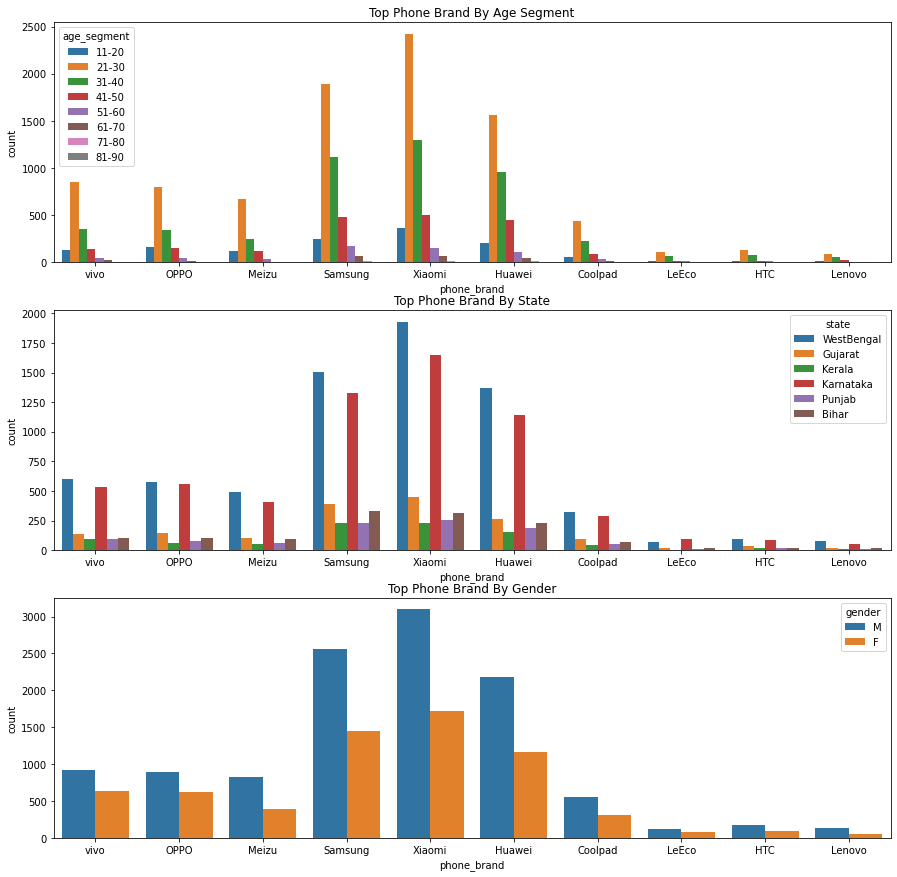

In [122]:
plt.figure(figsize= (15,15))

plt.subplot(3,1,1)
sns.countplot('phone_brand', hue='age_segment', data=top_brand_data_final).set(title='Top Phone Brand By Age Segment')

plt.subplot(3,1,2)
sns.countplot('phone_brand', hue='state', data=top_brand_data_final).set(title='Top Phone Brand By State')

plt.subplot(3,1,3)
sns.countplot('phone_brand', hue='gender', data=top_brand_data_final).set(title='Top Phone Brand By Gender')

# 6. Distribution of Gender for each State, Age Segment and Phone Brand(Consider only the 10 Most used Phone Brands).

In [123]:
data_filter_final=data_filter.drop_duplicates(subset='device_id')

In [124]:
data_filter_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19032 entries, 1 to 3252525
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   event_id      19032 non-null  int64   
 1   device_id     19032 non-null  float64 
 2   timestamp     19032 non-null  object  
 3   longitude     19032 non-null  float64 
 4   latitude      19032 non-null  float64 
 5   city          19032 non-null  object  
 6   state         19032 non-null  object  
 7   gender        19032 non-null  object  
 8   age           19032 non-null  int64   
 9   group         19032 non-null  object  
 10  phone_brand   19032 non-null  object  
 11  device_model  19032 non-null  object  
 12  age_segment   19032 non-null  category
dtypes: category(1), float64(3), int64(2), object(7)
memory usage: 1.9+ MB


[Text(0.5, 1.0, 'Gender By Top Phone Brand')]

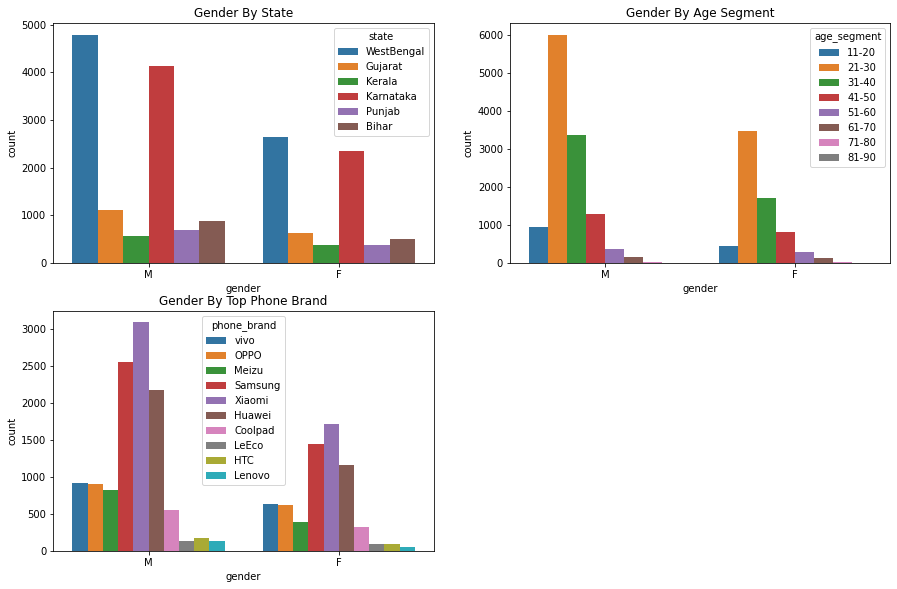

In [125]:
plt.figure(figsize= (15,15))

plt.subplot(3,2,1)
sns.countplot('gender', hue='state', data=data_filter_final).set(title='Gender By State')

plt.subplot(3,2,2)
sns.countplot('gender', hue='age_segment', data=data_filter_final).set(title='Gender By Age Segment')

plt.subplot(3,2,3)
sns.countplot('gender', hue='phone_brand', data=top_brand_data_final).set(title='Gender By Top Phone Brand')

In [126]:
data_filter_final.groupby('gender')['age_segment'].value_counts()

gender       
F       21-30    3475
        31-40    1700
        41-50     807
        11-20     442
        51-60     300
        61-70     127
        71-80      27
        81-90       2
M       21-30    6001
        31-40    3368
        41-50    1277
        11-20     949
        51-60     370
        61-70     148
        71-80      32
        81-90       7
Name: age_segment, dtype: int64

# 7. Distribution of Age Segments for each State, Gender and Phone Brand(Consider only the 10 Most used Phone Brands).

[Text(0.5, 1.0, 'Age Segment By Top Phone Brand')]

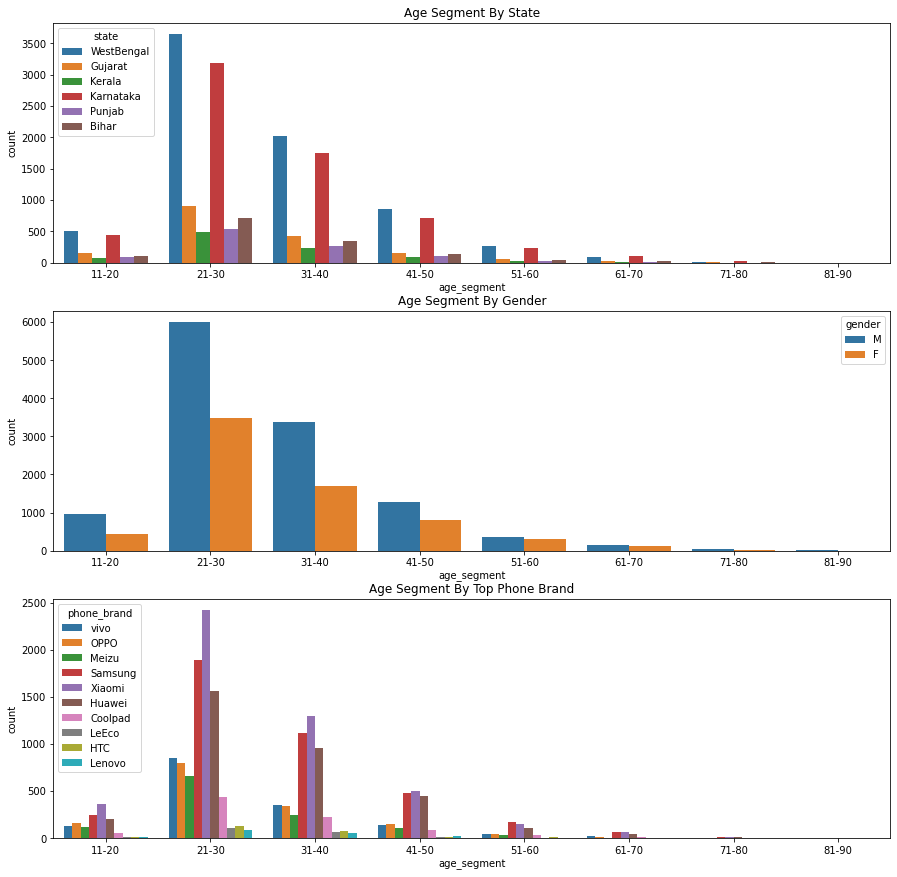

In [127]:
plt.figure(figsize= (15,15))

plt.subplot(3,1,1)
sns.countplot('age_segment', hue='state', data=data_filter_final).set(title='Age Segment By State')

plt.subplot(3,1,2)
sns.countplot('age_segment', hue='gender', data=data_filter_final).set(title='Age Segment By Gender')

plt.subplot(3,1,3)
sns.countplot('age_segment', hue='phone_brand', data=top_brand_data_final).set(title='Age Segment By Top Phone Brand')

In [128]:
data_filter_final.groupby('age_segment')['gender'].value_counts()

age_segment  gender
11-20        M          949
             F          442
21-30        M         6001
             F         3475
31-40        M         3368
             F         1700
41-50        M         1277
             F          807
51-60        M          370
             F          300
61-70        M          148
             F          127
71-80        M           32
             F           27
81-90        M            7
             F            2
Name: gender, dtype: int64

In [129]:
top_brand_data_final.groupby('age_segment')['phone_brand'].value_counts()

age_segment  phone_brand
11-20        Xiaomi         362
             Samsung        243
             Huawei         207
             OPPO           160
             vivo           129
                           ... 
81-90        Xiaomi           2
             HTC              1
             Huawei           1
             OPPO             1
             vivo             1
Name: phone_brand, Length: 73, dtype: int64

# 8. Hourly distribution of Phone Calls.

In [130]:
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422971 entries, 1 to 3252921
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   event_id      422971 non-null  int64   
 1   device_id     422971 non-null  float64 
 2   timestamp     422971 non-null  object  
 3   longitude     422971 non-null  float64 
 4   latitude      422971 non-null  float64 
 5   city          422971 non-null  object  
 6   state         422971 non-null  object  
 7   gender        422971 non-null  object  
 8   age           422971 non-null  int64   
 9   group         422971 non-null  object  
 10  phone_brand   422971 non-null  object  
 11  device_model  422971 non-null  object  
 12  age_segment   422971 non-null  category
dtypes: category(1), float64(3), int64(2), object(7)
memory usage: 58.5+ MB


In [131]:
data_filter["timestamp"] = pd.to_datetime(data_filter["timestamp"])

In [132]:
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422971 entries, 1 to 3252921
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   event_id      422971 non-null  int64         
 1   device_id     422971 non-null  float64       
 2   timestamp     422971 non-null  datetime64[ns]
 3   longitude     422971 non-null  float64       
 4   latitude      422971 non-null  float64       
 5   city          422971 non-null  object        
 6   state         422971 non-null  object        
 7   gender        422971 non-null  object        
 8   age           422971 non-null  int64         
 9   group         422971 non-null  object        
 10  phone_brand   422971 non-null  object        
 11  device_model  422971 non-null  object        
 12  age_segment   422971 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 58.5+ MB


In [133]:
data_filter["timestamp"].dt.hour

1          20
28         14
30         15
31          1
39         20
           ..
3252865     7
3252899     8
3252901     7
3252903    17
3252921    14
Name: timestamp, Length: 422971, dtype: int64

In [134]:
data_filter['hours']=data_filter["timestamp"].dt.hour

In [135]:
data_filter.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,gender,age,group,phone_brand,device_model,age_segment,hours
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal,M,30,M29-31,vivo,X5M,21-30,20
28,769546,-1.817502e+18,2016-05-01 14:07:23,88.371813,22.662852,Calcutta,WestBengal,F,43,F43+,OPPO,R819T,41-50,14
30,1750603,-5.598137e+18,2016-05-05 15:47:03,70.212684,23.118370,Gandhidham,Gujarat,M,23,M23-26,Meizu,MX3,21-30,15
31,3085968,-3.808297e+18,2016-05-07 01:25:47,75.513019,11.812367,Thalassery,Kerala,M,24,M23-26,vivo,X5L,21-30,1
39,1407594,-2.995508e+18,2016-05-03 20:01:35,77.805194,13.533295,ChikBallapur,Karnataka,M,29,M29-31,OPPO,R7 Plus,21-30,20


<AxesSubplot:xlabel='hours'>

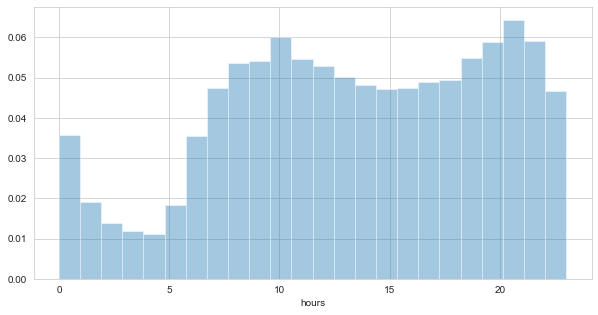

In [136]:
plt.figure(figsize= (10,5))
sns.set_style('whitegrid')
sns.distplot(data_filter.hours, kde=False, norm_hist=True, bins=24) #l, kde=False, norm_hist=True, bins=3

# 9. Plot the Users on the Map using any suitable package.

In [137]:
import plotly.express as px
import plotly

fig=px.scatter_geo(data_filter, 
                   lat='latitude', lon='longitude', 
                   hover_name="city", 
                   color="state", 
                   projection="natural earth")
fig.update_layout(geo_scope='asia', height=300, margin={"r":0,"t":0,"l":0,"b":0})

plotly.offline.plot(fig, filename = 'C:\\Users\\rahul_gupta17\\Downloads\\Map_Telecom.html', auto_open=True)

'C:\\Users\\rahul_gupta17\\Downloads\\Map_Telecom.html'